In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt

In [18]:
def plot_result(result,start_from=1,period=20,file_name="result",title="Event Study Coefficients with Confidence Intervals"):
    summary_table=pd.DataFrame(result.summary.tables[1].data[start_from:start_from+period+1],columns=result.summary.tables[1].data[0])
    summary_table["Time"]=np.array(list(range(-5,period-5+1)))
    # make each column of summary_table numeric
    summary_table=summary_table.apply(pd.to_numeric, errors='ignore')
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plot coefficients as points
    plt.plot(summary_table['Time'], summary_table["Parameter"], 'o-', label='Coefficients', color='b')

    # Plot confidence intervals as error bars
    # plt.errorbar(summary_table['Time'], summary_table["Parameter"],
    #              yerr=[summary_table["Parameter"] - summary_table['Lower CI'],
    #                    summary_table['Upper CI'] - summary_table["Parameter"]],
    #              fmt='none', ecolor='orange', elinewidth=2, capsize=4, label='Confidence Intervals')

    plt.fill_between(summary_table['Time'], summary_table['Lower CI'], summary_table['Upper CI'], color='orange', alpha=0.3, label='Confidence Intervals')

    plt.xlabel('Time')
    plt.ylabel("Parameter")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("./plots/{}.png".format(file_name),dpi=300,bbox_inches="tight",transparent=False,facecolor="white")
    plt.show()

In [19]:
df=pd.read_csv("../data/merged/len4_ndb_agg_DropNever.csv",encoding="shift-jis",index_col=0)

In [20]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
elasped_m5     -0.0791     0.0976    -0.8102     0.4181     -0.2707      0.1126
elasped_m4     -0.0046     0.0689    -0.0666     0.9469     -0.1399      0.1307
elasped_m3     -0.0466     0.0795    -0.5857     0.5583     -0.2027      0.1096
elasped_m2      0.0323     0.0836     0.3865     0.6992     -0.1319      0.1966
elasped_m1      0.0974     0.1042     0.9343     0.3505     -0.1073      0.3020
elasped_0       0.0079     0.1562     0.0508     0.9595     -0.2988      0.3147
elasped_1       0.0335     0.1120     0.2996     0.7646     -0.1864      0.2535
elasped_2       0.0179     0.1151     0.1559     0.8762     -0.2081      0.2439
elasped_3      -0.0363     0.1064    -0.3411     0.7332     -0.2452      0.1726
elasped_4      -0.0536     0.0925    -0.

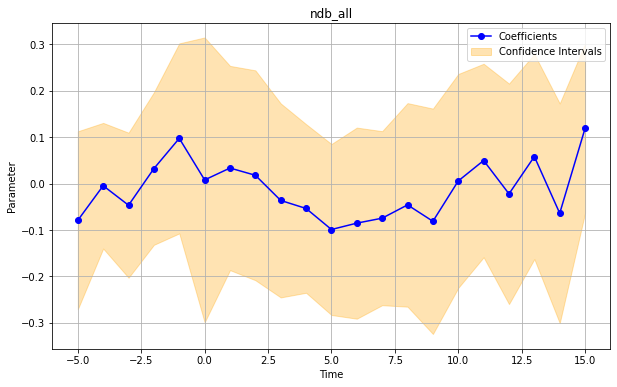

In [21]:
# all data
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"


# add generic indicator
formula+="+後発品区分"

# add generic per
formula+="+generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=20)

                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
elasped_m5     -0.2177     0.1665    -1.3080     0.1921     -0.5456      0.1101
elasped_m4     -0.0052     0.1265    -0.0409     0.9674     -0.2543      0.2439
elasped_m3     -0.1004     0.1387    -0.7239     0.4698     -0.3736      0.1728
elasped_m2      0.0290     0.1480     0.1960     0.8448     -0.2625      0.3205
elasped_m1      0.1147     0.1933     0.5932     0.5536     -0.2660      0.4954
elasped_0       0.0838     0.2319     0.3613     0.7182     -0.3729      0.5405
elasped_1       0.2008     0.2250     0.8924     0.3730     -0.2423      0.6439
elasped_2       0.1535     0.2098     0.7315     0.4651     -0.2597      0.5667
elasped_3       0.0849     0.2084     0.4071     0.6843     -0.3256      0.4954
elasped_4       0.0726     0.1869     0.

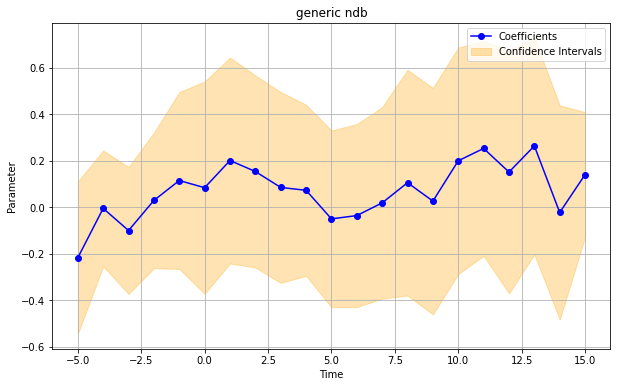

In [22]:
# generic data
formula="log_quantity~generic_per+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"

# add generic_per
formula+="+generic_per"
mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=20)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.0592
Estimator:                   PanelOLS   R-squared (Between):             -0.0672
No. Observations:                 343   R-squared (Within):              -136.49
Date:                Wed, Aug 23 2023   R-squared (Overall):             -2.0451
Time:                        11:24:37   Log-likelihood                    65.069
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.8157
Entities:                          43   P-value                           0.6998
Avg Obs:                       7.9767   Distribution:                  F(21,272)
Min Obs:                       7.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          1.971e+08
                            

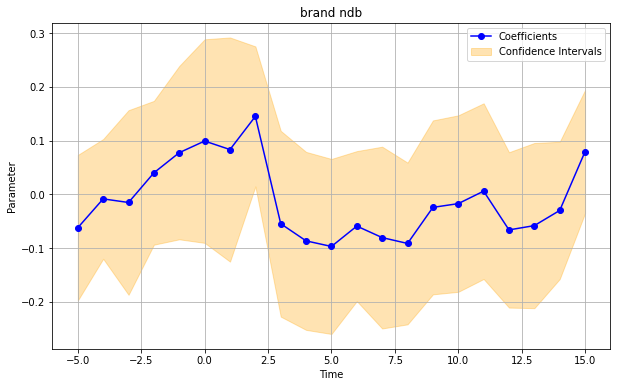

In [23]:
# branded data
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# till elasped_20
formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+TimeEffects+EntityEffects"
# add generic_per
formula+="+generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=20)
